## Predicting timbre by the Fourier transform

### Intro

By analyzing a soundwave using the FFT, this widget helps interpolate the spectral distribution to create a rough model of a player's timbre. Still fine-tuning some of the normalization, but will perform modestly on a few bars (given that recordings are regular enough).

### Author

By Daniel Zhao

### Transforming the data

In [17]:
# import necessary modules

import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

In [11]:
import scipy.io.wavfile as wav

In [118]:
def transform(name):
    
    # read in the soundwave
    fs, data = wav.read(name)
    all_sound = data.T[0]
    
    #truncate the sound
    truncated = all_sound[:60000]
    
    # normalize for 16-bit wav file
    norm=[(ele/2**16.)*2-1 for ele in truncated]
    
    #apply the fft!
    return fft(norm)

### Including the fundamental frequency

In [119]:
transformed1 = transform('test.wav')
transformed2 = transform('test2.wav')

/Users/Alex/anaconda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


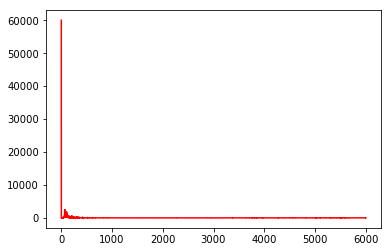

In [121]:
## plotting the real components, up to 1000

plt.plot(abs(transformed2[:6000]),'r') 
plt.show()

### Without fundamental frequency

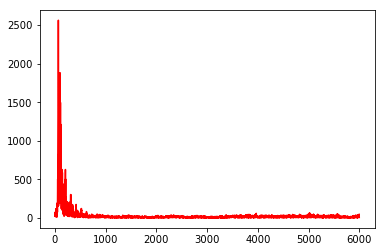

In [122]:
plt.plot(abs(transformed2[1:6000]),'r') 
plt.show()

The fundamental frequency is orders of magnitude larger than any of the other components.

In [123]:
## sampling freqency of our test.wav

fs = 44100

In [129]:
interpolated = np.interp([1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 5999], x[1:], abs(transformed[1:6000]))

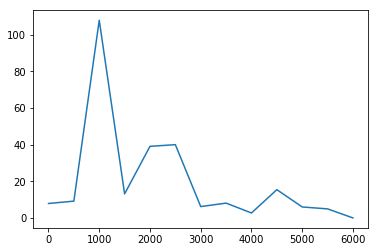

In [130]:
plt.plot([1, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 5999], interpolated)
plt.show()

### Listening to the music

Run these cells if you want to here what your waveform sounds like after being truncated/normalized!

In [46]:
import sounddevice as sd

In [64]:
## Listen to truncated version

sd.play(norm) 